In [1]:
from z3 import *
import numpy as np
import random
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.autolayout"] = True # to for tight_layout()

# our library
from sat_metropolis import mcmc, sat, smt, models

In [2]:
num_con = 4
reduction_factor = 2
num_bits = 10
max_int_bv = 2**8-1

In [3]:
(g, num_bits, num_vars) = models.get_roads_sat(num_bits = num_bits,
                                               max_int_bv = max_int_bv,
                                               num_con=num_con,
                                               y_reduction_factor=reduction_factor)

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [4]:
trace = mcmc.sample_mh_trace_from_z3_model(backend='cmsgen',
                                           z3_problem=g,
                                           num_vars=num_vars,
                                           num_bits=num_bits,
                                           num_samples=10000, 
                                           num_chains=4)

c CMSGen Copyright Mate Soos (soos.mate@gmail.com)
c CMSGen SHA revision 422a9dbaba3f749c2df811d9dfab7ffd4627bac5
c CMSGen is MIT licensed
c CMSGen compilation env CMAKE_CXX_COMPILER = /usr/bin/c++ | CMAKE_CXX_FLAGS =  -mtune=native -Wall -Wextra -Wunused -Wsign-compare -fno-omit-frame-pointer -Wtype-limits -Wuninitialized -Wno-deprecated -Wstrict-aliasing -Wpointer-arith -Wpointer-arith -Wformat-nonliteral -Winit-self -Wparentheses -Wunreachable-code -ggdb3 -Wno-class-memaccess -Wlogical-op -Wrestrict -Wnull-dereference -Wdouble-promotion -Wshadow -Wformat=2 -Wextra-semi -pedantic | COMPILE_DEFINES =  -DUSE_GAUSS -DUSE_ZLIB -DYALSAT_FPU | STATICCOMPILE = OFF | ZLIB_FOUND = TRUE | VALGRIND_FOUND =  | ENABLE_TESTING =  | SLOW_DEBUG = OFF | ENABLE_ASSERTIONS = ON | MY_TARGETS =  | LARGEMEM =  | LIMITMEM =  | 
c CMSGen compiled with gcc version 13.2.0
c executed with command line: cmsgen --samples 10000 --samplefile cmsgen_input/cmsgen_samples.out cmsgen_input/z3_problem.cnf
c Writing sam

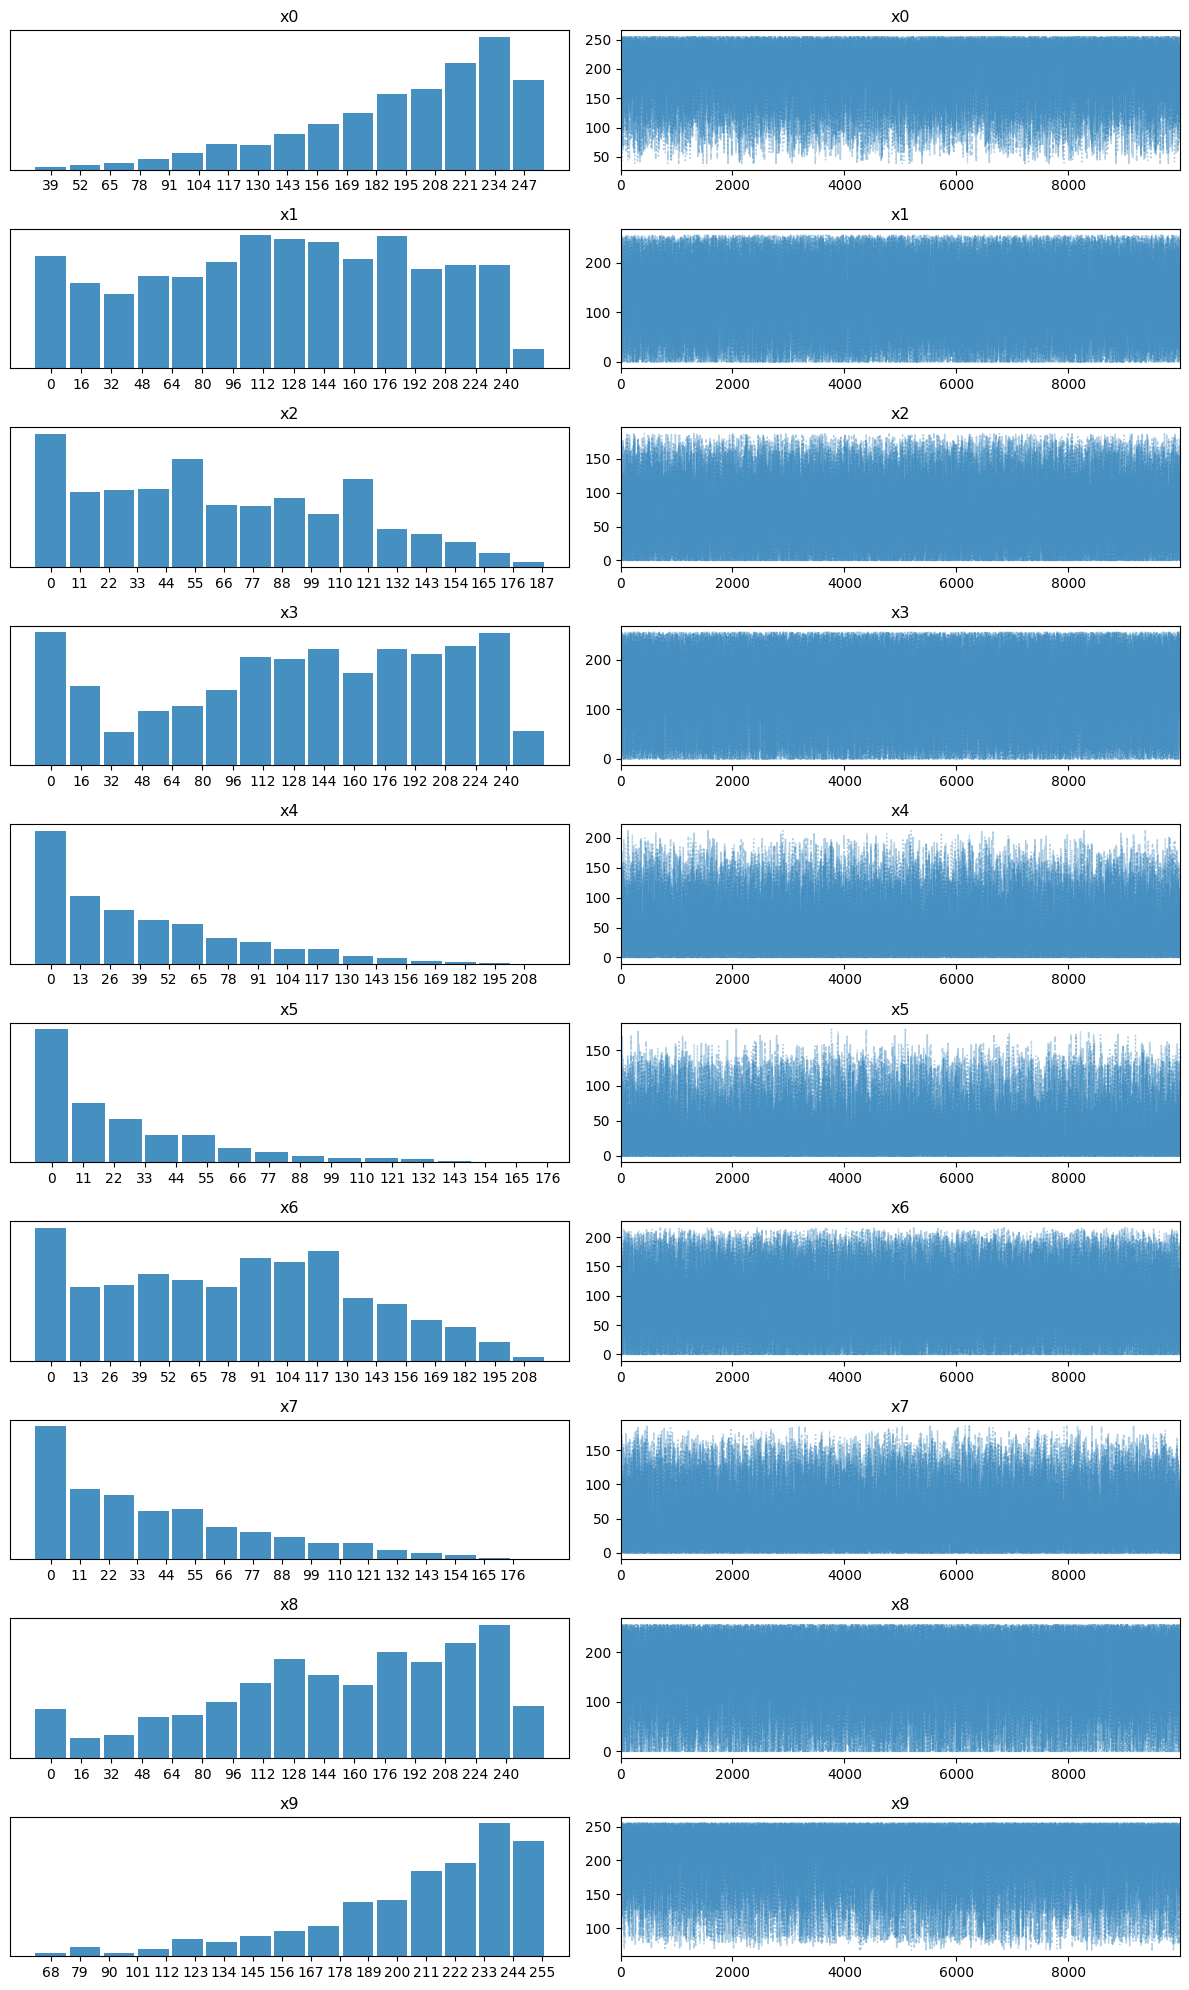

In [5]:
# Plot the posterior
az.plot_trace(trace);
plt.savefig('cmsgen_trace_plot.png', dpi=150);

In [6]:
# Diagnosis
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x0,201.180,46.083,114.0,255.0,0.232,0.177,39295.0,39377.0,1.0
x1,131.261,71.793,0.0,239.0,0.360,0.179,39702.0,39270.0,1.0
x2,69.948,48.500,0.0,150.0,0.244,0.126,39337.0,39273.0,1.0
x3,140.610,76.648,0.0,246.0,0.387,0.190,39336.0,39373.0,1.0
x4,45.514,43.016,0.0,128.0,0.220,0.175,38238.0,38864.0,1.0
x5,29.846,32.459,0.0,91.0,0.167,0.164,37578.0,38757.0,1.0
x6,86.819,55.343,0.0,176.0,0.286,0.142,38070.0,39938.0,1.0
x7,45.318,40.698,0.0,124.0,0.206,0.152,39382.0,39633.0,1.0
x8,161.457,69.381,31.0,255.0,0.346,0.211,40279.0,40300.0,1.0
x9,213.113,40.321,130.0,255.0,0.203,0.179,39349.0,38120.0,1.0


In [7]:
az.to_netcdf(trace, f'roads_cmsgen_con_{num_con}_rf_{reduction_factor}_bits_{num_bits}_max_int_{max_int_bv}.nc')

'roads_cmsgen_con_4_rf_2_bits_10_max_int_255.nc'